In [1]:
%matplotlib inline
import keras 
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation,Conv2D,MaxPooling2D,Dropout,Flatten,Reshape,UpSampling2D,Deconvolution2D,Conv2DTranspose
import numpy as np
from keras.callbacks import TensorBoard
#from keras.layers
import cv2

/home/pawanagr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
print(x_train.shape)
x_1 = np.zeros((50000,32,32)) 
for i in range(50000):
    x_1[i] = cv2.cvtColor(x_train[i],cv2.COLOR_RGB2GRAY)
x_1.shape

(50000, 32, 32, 3)


(50000, 32, 32)

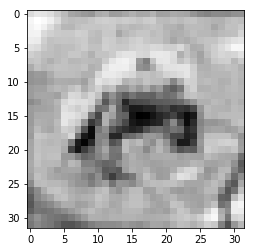

In [4]:
plt.imshow(x_1[0],cmap='Greys')

In [5]:
np.max(x_1[0])

251.0

In [6]:
x_train_1=x_1/255.0
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [7]:
np.max(x_train_1[0])

0.984313725490196

In [8]:
input_img = Input(shape=(32,32,1))

l1 = Conv2D(32, (3,3),strides = 1 , activation = 'relu',padding='same')(input_img)
l1 = MaxPooling2D((2,2))(l1)
l1 = Conv2D(16,(3,3),strides = 1, activation='relu',padding='same')(l1)
l1 = MaxPooling2D((2,2),padding = 'same')(l1)
l1 = Conv2D(8,(3,3),strides = 1,activation = 'relu',padding='same')(l1)

l1 = Conv2DTranspose(16,(3,3),strides = 1,activation='relu',padding='same')(l1)
l1 = UpSampling2D((2,2))(l1)
l1 = Conv2DTranspose(32,(3,3),strides = 1,activation='relu',padding = 'same')(l1)
l1 = UpSampling2D((2,2))(l1)
l2 = Conv2DTranspose(1,(3,3),strides = 1, activation='sigmoid',padding  ='same')(l1)
'''

#################encoded
#l1 = Conv2D(4, (1, 1),activation='relu')(l1)
#############decoder
l1 = UpSampling2D((2,2))(l1)
l1 = Conv2D(8, (3, 3),activation='relu',padding = 'same')(l1)
l1 = UpSampling2D((2,2))(l1)
l1 = Conv2DTranspose(16, (3, 3),activation='relu')(l1)
l1 = UpSampling2D((2,2))(l1)
l2 = Conv2DTranspose(1, (3, 3),activation='relu',padding='same')(l1)
'''
model2 = Model(input_img, l2)
model2.compile(optimizer='Adam', loss='binary_crossentropy')
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 16)          1168      
__________

In [9]:
x_train_ = x_train_1 + 0.001 * np.random.normal(loc=0.0, scale=1.0, size=(50000,32,32))
x_train_ = np.clip(x_train_, 0., 1.)
x_ = x_train_[:,:,:,np.newaxis]
x_.shape

(50000, 32, 32, 1)

In [10]:
np.max(x_[0])

0.9838540759895986

In [11]:

if (x_[0]>.9).all == False:
    print ('l')
np.min(x_[0])

0.0

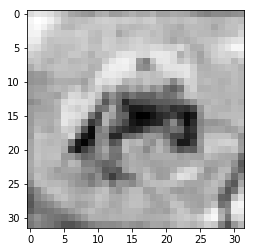

In [12]:
plt.imshow(np.reshape(x_train_[0],(32,32)),cmap='Greys')

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model2.fit(x_, x_train_1[:,:,:,np.newaxis], epochs = 10, batch_size = 256, callbacks = [tensorboard])

Epoch 1/10
50000/50000 [==============================] - 106s 2ms/step - loss: 0.6116
Epoch 2/10
50000/50000 [==============================] - 107s 2ms/step - loss: 0.5836
Epoch 3/10
50000/50000 [==============================] - 113s 2ms/step - loss: 0.5798
Epoch 4/10
50000/50000 [==============================] - 123s 2ms/step - loss: 0.5779
Epoch 5/10
32000/50000 [==================>...........] - ETA: 41s - loss: 0.5764

In [53]:
pp = model2.predict(np.reshape(x_[0],(1,32,32,1)))

In [55]:
pp = np.reshape(pp,(32,32))

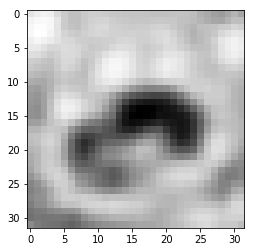

In [56]:
plt.imshow(pp,cmap='Greys')

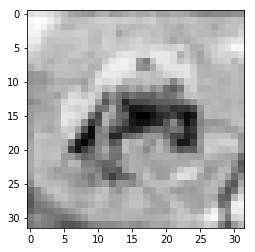

In [58]:
plt.imshow(np.reshape(x_[0],(32,32)),cmap='Greys')

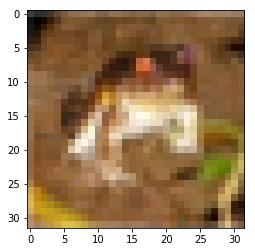

In [59]:
plt.imshow(x_train[0],cmap='Greys')